# Customer Segmentatio Analysis - Final Project 

# Background 

Go Good is a protein powder and supplement online retailer operating in New Zealand and Australia. The company has been growing steadily for the past 5 years, building its customer base and diversifying the product offering.  In June 2018 the company rebranded as ‘Go Good’ and launched a new ecommerce website.

# Problem statement / Goal 
Being a relatively new brand in the market, Go Good has yet to explore any customer segmentation or Customer Lifetime Value analysis. The main goal of this project is to identify different segments of customers through analysis of historical customer purchase data. Shopify offers predefined customer segments such as ‘loyal and ‘at risk’. This project will also aim to build a model that replicates these segments, based upon 3 core metrics, namely Recency, Frequency, and Monetary Value (RFM).  The insights drawn from this analysis can then be used to tailor marketing strategy, for example delivering different messages to highly profitable customer segments.  


# Success metrics 
The main KPI of this project will be the ability to build an effective model that clearly segments customers into distinct groups. As the project will be using K-means clustering, silhouette score is one metric that will be evaluated to measure the effectiveness of clusters within the model.  A Logistic Regression model will also be created to predict classes of customers e.g. loyal or at risk. To measure the success of this model, sklearn’s accuracy, precession, and recall scores will be used. Additionally, a ROC curve will be utilized to measure the true positive rate against the false positive rate.  


# Data
The data used in this project was obtained through Shopify, the eCommerce platform upon which the Go Good website is built. The data frame spans a 1-year time period, from 6.12.18 – 6.10.19. Each record within the data frame is a relates to a purchase made by a customer on a given date. In total there are 4,784 purchases, and 3,182 unique customers within the dataframe.

The variables included are outlined below:

- 	**Day** – The date the order was placed
- 	**Order_ID** – The unique ID assigned to each purchase
- 	**Customer_ID** – The unique ID assiogned to each customer
- 	**Product_Type** – The family of a given product e.g. whey protein
- 	**Product_Title** – The name of the individual product
- 	**Product_price** – The price of the product
- 	**Total_sales** – The monetary value of the sale 
- 	**Discounts** – Refers to if a discount was applied to a purchase
- 	**Units_per_transaction** – The number of products purchase in a single transaction
- 	**Customer_type** – Refers to if a customer is either new or returning
- 	**At_risk** – Customers who are a repeat customer and estimated to have a medium probability of returning, but who have not placed an order in a while.
-   **Loyal** – Repeat customers who are estimated to have a high probability of returning, and have placed more orders than the average customer.
- 	**Dormant** - Customers who have a low probability of returning to make another purchase
- 	**Promising** - Customers who are estimated to have a high probability of returning and becoming a loyal customer.


# Data Preprocessing & Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import datetime as dt

from scipy import stats
import seaborn as sns

In [2]:
gogood = pd.read_csv("C:/Users/andre/Desktop/ga/final-project/Go-good-customers.csv")

In [3]:
#print the first five rows.
gogood.head()

,day,order_id,customer_id,customer_name,product_type,product_title,product_id,shipping_city,shipping_postal_code,product_price,total_sales,discounts,units_per_transaction,customer_type,at_risk,loyal,dormant,promising
0,6/12/2018,431055175727,514963636271,Lindsay Borland,Whey Protein,Organic Vanilla Whey Protein Powder,555924291631,Auckland,2022.0,56,112,0,2,First-time,No,No,No,No
1,6/12/2018,430915026991,514794946607,Olivia Wells,Whey Protein,Organic Vanilla Whey Protein Powder,555924291631,Auckland,1010.0,56,112,0,2,First-time,No,No,No,Yes
2,6/12/2018,430975877167,514870345775,jess nelson,Whey Protein,Organic Chocolate Whey Protein Powder,555924455471,Tauranga,3179.0,59,59,0,1,First-time,No,No,No,No
3,6/12/2018,430958739503,514851831855,Daniel Manolas,Whey Protein,Organic Chocolate Whey Protein Powder,555924455471,Auckland,632.0,56,56,0,1,First-time,No,No,No,No
4,6/12/2018,430999568431,514901901359,Mark Greene,Whey Protein,Organic Chocolate Whey Protein Powder,555924455471,Auckland,630.0,56,46,-9,1,First-time,Yes,No,No,No


In [4]:
#print the last 5 rows. 
gogood.tail()

,day,order_id,customer_id,customer_name,product_type,product_title,product_id,shipping_city,shipping_postal_code,product_price,total_sales,discounts,units_per_transaction,customer_type,at_risk,loyal,dormant,promising
6913,6/10/2019,854204252207,1068237848623,Sophie Lax,Upselly Bundle,Stainless Steel Shaker Add-On,1013769011247,Auckland,6022.0,7,7,0,1,First-time,No,No,No,No
6914,6/10/2019,854021931055,648328773679,Taryn Currie,Upselly Bundle,Stainless Steel Shaker Add-On,1013769011247,Kaiapoi,7692.0,7,7,0,1,Returning,No,Yes,No,No
6915,6/10/2019,854303539247,1068383469615,Jackie Walker,Shaker,Stainless Steel Shaker - Pink,1151594659887,Auckland,2019.0,12,0,-12,1,First-time,No,No,No,No
6916,6/10/2019,853557903407,1067350720559,kirsty Ballot,Sample Pack,Free Protein Sample Pack,1091945332783,Auckland,620.0,0,0,0,1,First-time,No,No,No,No
6917,6/10/2019,854200123439,1006621622319,June Hart,Sample Pack,Free Protein Sample Pack,1091945332783,Takanini,2112.0,0,0,0,1,First-time,No,No,No,No


In [5]:
#Show the row index
gogood.index

RangeIndex(start=0, stop=6918, step=1)

In [6]:
#check column names 
gogood.columns

Index(['day', 'order_id', 'customer_id', 'customer_name', 'product_type',
       'product_title', 'product_id', 'shipping_city', 'shipping_postal_code',
       'product_price', 'total_sales', 'discounts', 'units_per_transaction',
       'customer_type', 'at_risk', 'loyal', 'dormant', 'promising'],
      dtype='object')

In [7]:
#check the number of rows and columns, there are 6,918 rows and 18 columns 
gogood.shape

(6918, 18)

In [8]:
#Check the datatypes of each columnn
gogood.dtypes

day                       object
order_id                   int64
customer_id                int64
customer_name             object
product_type              object
product_title             object
product_id                 int64
shipping_city             object
shipping_postal_code     float64
product_price              int64
total_sales                int64
discounts                  int64
units_per_transaction      int64
customer_type             object
at_risk                   object
loyal                     object
dormant                   object
promising                 object
dtype: object

In [9]:
#Change the customer ID, order ID and Product ID column from int to object
gogood['customer_id'] = gogood['customer_id'].astype(str)
gogood['order_id'] = gogood['order_id'].astype(str)
gogood['product_id'] = gogood['product_id'].astype(str)

#Drop the customer name, shipping_city and shipping_postal_code features from the original dataframe, we will not use these. 
gogood.drop(['customer_name', 'shipping_city', 'shipping_postal_code'], axis=1, inplace=True)

In [10]:
#Change the 'day' column from object to pandas datetime format. 
gogood['day'] = pd.to_datetime(gogood['day'])

In [11]:
#Check the customer ID, order ID and Product ID columns are coverted to object
#Check the shipping_city and shipping_postal_code no longer appear in the dataframe
#Check the day column is appearing as a datetime object
gogood.dtypes

day                      datetime64[ns]
order_id                         object
customer_id                      object
product_type                     object
product_title                    object
product_id                       object
product_price                     int64
total_sales                       int64
discounts                         int64
units_per_transaction             int64
customer_type                    object
at_risk                          object
loyal                            object
dormant                          object
promising                        object
dtype: object

In [234]:
#The last 5 columns relate to binary classifcations, e.g. customer_type is either "returning" or "first-time".
#Using pd.get_dummies from Pandas, we will create dummy variables to turn these features into numerical values.
gogood['customer_type'] = pd.get_dummies(gogood.customer_type, prefix='customer_type', drop_first=True)
gogood['at_risk'] = pd.get_dummies(gogood.at_risk, prefix='at_risk', drop_first=True)
gogood['loyal'] = pd.get_dummies(gogood.loyal, prefix='loyal', drop_first=True)
gogood['dormant'] = pd.get_dummies(gogood.dormant, prefix='dormant', drop_first=True)
gogood['promising'] = pd.get_dummies(gogood.promising, prefix='promising', drop_first=True)

In [13]:
#Check the last 5 columns are now numerical values (0, or 1)
gogood.head()

,day,order_id,customer_id,product_type,product_title,product_id,product_price,total_sales,discounts,units_per_transaction,customer_type,at_risk,loyal,dormant,promising
0,2018-06-12,431055175727,514963636271,Whey Protein,Organic Vanilla Whey Protein Powder,555924291631,56,112,0,2,0,0,0,0,0
1,2018-06-12,430915026991,514794946607,Whey Protein,Organic Vanilla Whey Protein Powder,555924291631,56,112,0,2,0,0,0,0,1
2,2018-06-12,430975877167,514870345775,Whey Protein,Organic Chocolate Whey Protein Powder,555924455471,59,59,0,1,0,0,0,0,0
3,2018-06-12,430958739503,514851831855,Whey Protein,Organic Chocolate Whey Protein Powder,555924455471,56,56,0,1,0,0,0,0,0
4,2018-06-12,430999568431,514901901359,Whey Protein,Organic Chocolate Whey Protein Powder,555924455471,56,46,-9,1,0,1,0,0,0


In [14]:
#Check for any missing values within each column, we can see there are 52 instances of product_type returning a null value
gogood.isnull().sum()

day                       0
order_id                  0
customer_id               0
product_type             52
product_title             0
product_id                0
product_price             0
total_sales               0
discounts                 0
units_per_transaction     0
customer_type             0
at_risk                   0
loyal                     0
dormant                   0
promising                 0
dtype: int64

In [15]:
#Filter to all instances where product_type is null, sorting by total_sales in decending order
#There are rows containing total_sales, but do not have a corresponding product ID or product type
gogood[gogood.product_type.isnull()].sort_values('total_sales', ascending=False).head()

,day,order_id,customer_id,product_type,product_title,product_id,product_price,total_sales,discounts,units_per_transaction,customer_type,at_risk,loyal,dormant,promising
4641,2019-02-12,719159394351,888617205807,NaN,Per Xero Invoice 1296,0,1055,1055,0,1,0,0,0,0,0
2752,2018-11-01,605716938799,746698997807,NaN,Per Xero INV 1087,0,420,420,0,1,0,0,0,0,0
3211,2018-11-29,636237545519,778079862831,NaN,Per Xero invoice #1176,0,54,54,0,1,0,0,0,0,1
5926,2018-09-17,569286098991,530528632879,NaN,Wholesale order handling and processing,0,10,10,0,1,1,0,1,0,0
5190,2019-03-06,746435444783,874969006127,NaN,Wholesale order handling and processing,0,10,10,0,1,0,1,0,0,0


In [16]:
#Create a mask to filter on all rows with no product ID or product type. 
#The first 3 rows are sales that were manually input, and do not have any product type or product ID. We will remove these values.
#All other rows are wholesales order fees, which can also be removed. 
mask = (gogood.product_id == '0') & (gogood.product_type.isnull())
gogood[mask].sort_values('product_title', ascending=True)

,day,order_id,customer_id,product_type,product_title,product_id,product_price,total_sales,discounts,units_per_transaction,customer_type,at_risk,loyal,dormant,promising
2752,2018-11-01,605716938799,746698997807,NaN,Per Xero INV 1087,0,420,420,0,1,0,0,0,0,0
4641,2019-02-12,719159394351,888617205807,NaN,Per Xero Invoice 1296,0,1055,1055,0,1,0,0,0,0,0
3211,2018-11-29,636237545519,778079862831,NaN,Per Xero invoice #1176,0,54,54,0,1,0,0,0,0,1
5190,2019-03-06,746435444783,874969006127,NaN,Wholesale order handling and processing,0,10,10,0,1,0,1,0,0,0
5284,2019-03-12,752015147055,523916083247,NaN,Wholesale order handling and processing,0,10,10,0,1,0,0,0,0,0
5285,2019-03-12,752308453423,517918162991,NaN,Wholesale order handling and processing,0,10,10,0,1,1,0,1,0,0
5354,2019-03-16,756159643695,874969006127,NaN,Wholesale order handling and processing,0,10,10,0,1,1,1,0,0,0
5594,2019-03-25,765237428271,699301789743,NaN,Wholesale order handling and processing,0,10,10,0,1,1,0,0,0,1
5784,2019-04-03,774439075887,517918162991,NaN,Wholesale order handling and processing,0,10,10,0,1,1,0,1,0,0
5848,2019-04-08,780748816431,880218046511,NaN,Wholesale order handling and processing,0,10,10,0,1,0,0,0,0,0


In [17]:
#Drop the rows containing no product_type or product_id 
gogood.drop(gogood[mask].index, inplace=True)

In [18]:
gogood.shape

(6866, 15)

In [19]:
#Check for null values again, we now have none! 
gogood.isnull().sum()

day                      0
order_id                 0
customer_id              0
product_type             0
product_title            0
product_id               0
product_price            0
total_sales              0
discounts                0
units_per_transaction    0
customer_type            0
at_risk                  0
loyal                    0
dormant                  0
promising                0
dtype: int64

In [20]:
#Check the number of unique values for each column. We have 8 different product groups, and 62 product variations. 
#There is 3182 total unique customers. 
gogood.nunique()

day                       364
order_id                 4784
customer_id              3182
product_type                8
product_title              62
product_id                 33
product_price              42
total_sales               146
discounts                  67
units_per_transaction      11
customer_type               2
at_risk                     2
loyal                       2
dormant                     2
promising                   2
dtype: int64

In [21]:
#show 'five-number' summary statistics. Here we can see the min product price and total sales are both 0
gogood.describe()

,product_price,total_sales,discounts,units_per_transaction,customer_type,at_risk,loyal,dormant,promising
count,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000
mean,36.306146,42.470580,-4.706234,1.235217,0.352898,0.063793,0.255025,0.045733,0.095543
std,26.288058,44.074324,14.940798,0.828052,0.477906,0.244401,0.435907,0.208920,0.293985
min,0.000000,0.000000,-190.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,45.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,59.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,169.000000,468.000000,0.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that the min value for product price and total sales is 0, which needs further investigation.

In [22]:
#Filter by total sales = 0, and discounts in ascending order.
gogood[gogood.total_sales == 0].sort_values('discounts', ascending=True)

,day,order_id,customer_id,product_type,product_title,product_id,product_price,total_sales,discounts,units_per_transaction,customer_type,at_risk,loyal,dormant,promising
2354,2018-10-11,589076234287,498402852911,Whey Protein,Organic Chocolate Whey Protein Powder,555924455471,56,0,-112,2,1,0,1,0,0
5691,2019-03-30,770219016239,740980916271,Performance Whey Protein,Organic Vanilla Whey Protein Isolate,555924193327,69,0,-69,1,1,0,1,0,0
5562,2019-03-24,764156805167,938236149807,Performance Whey Protein,Organic Chocolate Whey Protein Isolate,555924127791,69,0,-69,1,0,0,0,0,0
5563,2019-03-24,764172271663,824180899887,Performance Whey Protein,Organic Vanilla Whey Protein Isolate,555924193327,69,0,-69,1,0,0,0,0,0
5564,2019-03-24,764280471599,742320898095,Performance Whey Protein,Organic Vanilla Whey Protein Isolate,555924193327,69,0,-69,1,1,0,0,0,1
5595,2019-03-25,764911845423,700964470831,Performance Whey Protein,Organic Vanilla Whey Protein Isolate,555924193327,69,0,-69,1,1,0,0,0,1
5849,2019-04-08,780498010159,530816794671,Performance Whey Protein,Organic Vanilla Whey Protein Isolate,555924193327,69,0,-69,1,1,0,1,0,0
5596,2019-03-25,764673359919,938818732079,Performance Whey Protein,Organic Vanilla Whey Protein Isolate,555924193327,69,0,-69,1,0,0,0,0,1
5597,2019-03-25,764673196079,904979841071,Performance Whey Protein,Organic Chocolate Whey Protein Isolate,555924127791,69,0,-69,1,1,0,1,0,0
5598,2019-03-25,765232414767,939379720239,Performance Whey Protein,Organic Vanilla Whey Protein Isolate,555924193327,69,0,-69,1,0,0,0,0,0


For instances where total sales is 0, but there is a product price, we can also see there was a corresponding discount applied to the sale, matching the product price.This is a result of "buy one product, get another free" promotions. 

We can also see multiple rows where product_price, total_sales and discounts are 0. Go Good offers free samples to try encourage new customers to try the product. Given these products are free, total sales shows 0. 

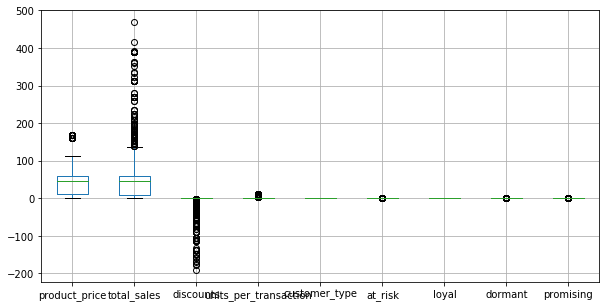

In [23]:
#Create box plots to check the distributions of the dataframe
gogood.boxplot(figsize=(10,5))

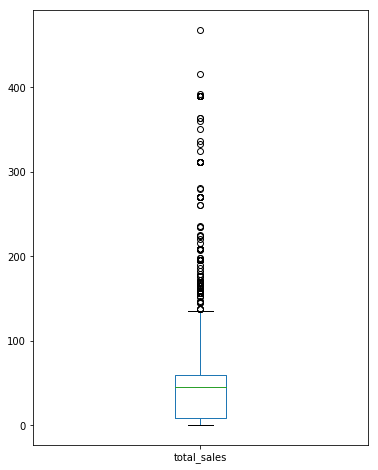

In [24]:
#Isolate the total sales boxplot 
gogood.total_sales.plot(kind='box', figsize=(6,8))

The total_sales column appears to have a positive right skew. This can be explained by wholesale orders e.g. coming from gyms, which are typically bulk purchases. 

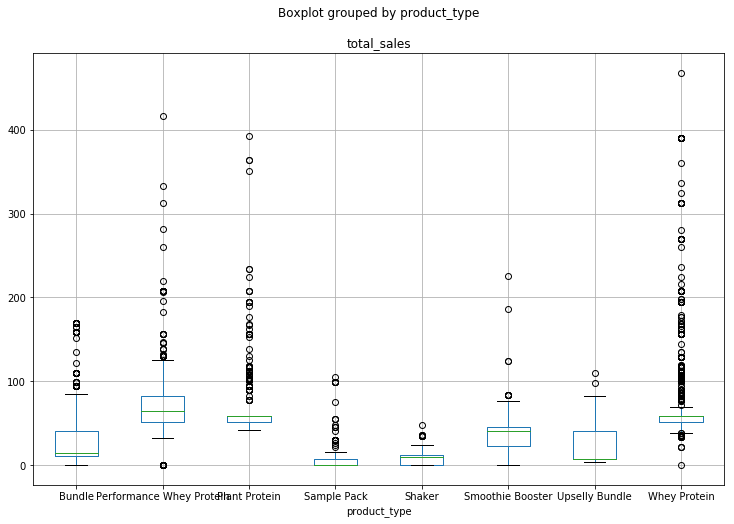

In [25]:
#Boxplot looking at total sales by product type. 
gogood.boxplot(column='total_sales', by='product_type', figsize=(12,8))

Looking at total sales by product type, we can see that the Performance Whey Protein, Plant Protein, Sample Pack and Whey Protein products all have positive right skews, with long tails comprising of multiple outliers. Again, this skew can be explained by wholesale purchases. 

For every product type (apart from Plant Protein and the UpSelly bundle) we can see there are either outliers or minimum at zero. As mentioned earlier, this is explained by the discounts codes being applied to sales, as well as free samples.

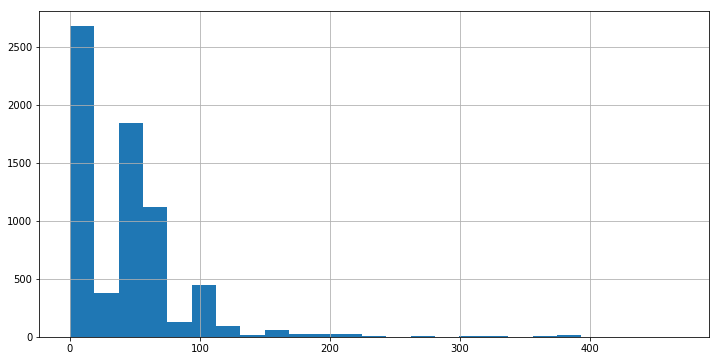

In [26]:
#Check the distribution of the total sales
gogood.total_sales.hist(figsize=(12, 6), bins=25)

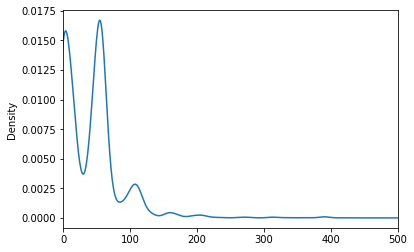

In [27]:
# Compare with density plot (smooth version of a histogram).
gogood.total_sales.plot(kind='density', xlim=(0, 500));

In [28]:
#Create a dataframe of numerical values
gogood_numerical_col = gogood[['total_sales', 'product_price', 'units_per_transaction', 'customer_type', 'loyal', 'at_risk']]

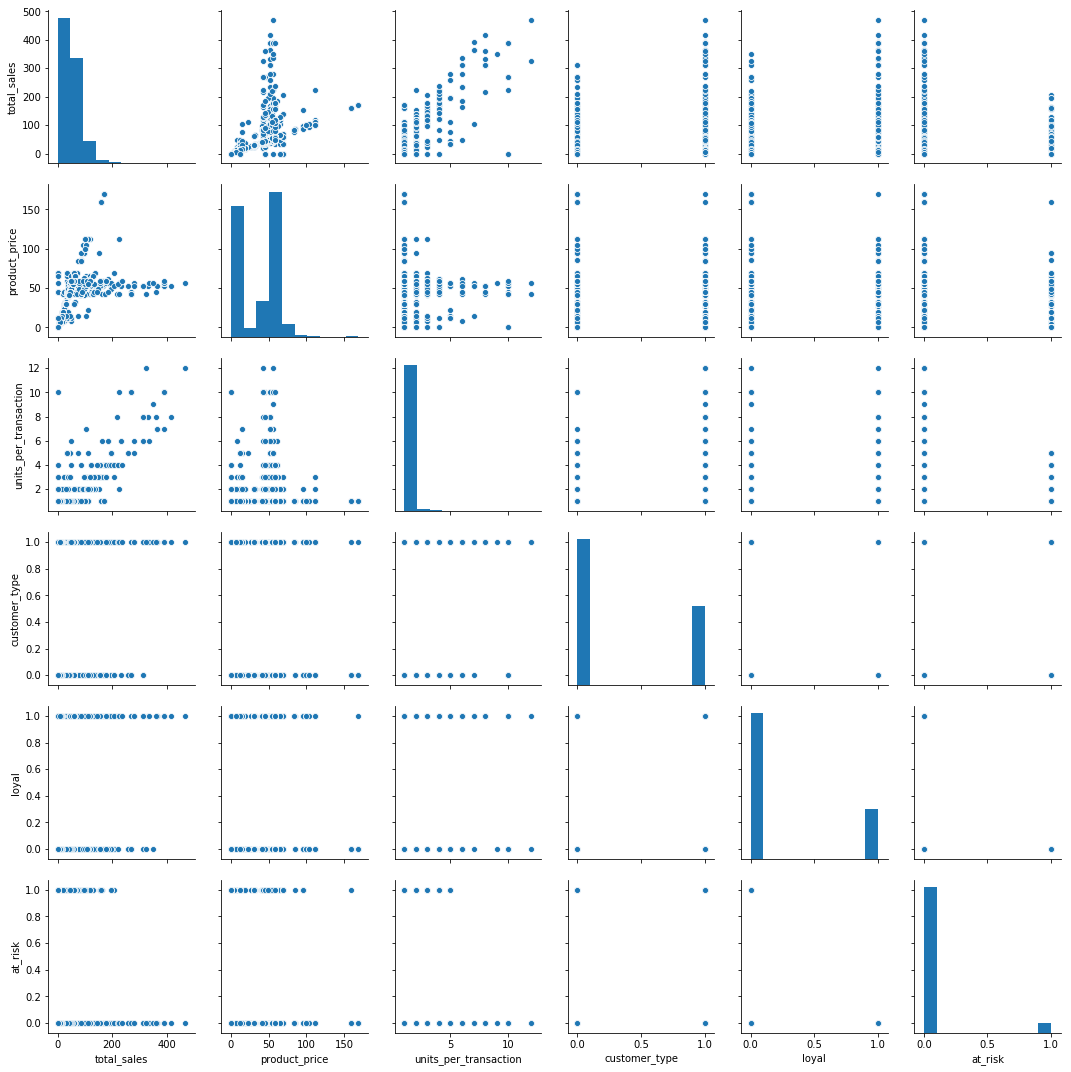

In [29]:
#Using a pairplot to explore the relationship between features. 
sns.pairplot(gogood_numerical_col)

Looking at the relationship between variables, there are some interesting patterns that emerge. For example, it appears the majority of total sales are centered around the $50 product price range. There also appears to be a positive linear relationship between total sales and units per transaction, which is to be expected. 

We can also see total sales appears to be higher for loyal customers as well as returning customers (customer type), which is also what we would expect to see. Next, we will look at different techniques for evaluating customers into different segments.

# Methodologies

### Calculating RFM Values

RFM is a technique for organizing your customers from least valuable to most valuable by taking into account the following factors:

Recency refers to the last time that a customer made a purchase. A customer who has made a purchase recently is more likely to make a repeat purchase than a customer who hasn’t made a purchase in a long time.

Frequency refers to how many times a customer has made a purchase within a given time frame. A customer who makes purchases often is more likely to continue to come back than a customer who rarely makes purchases.

Monetary Value refers to the amount of money a customer has spent within that same time frame. A customer who makes larger purchases is more likely to return than a customer who spends less.

In [30]:
gogood.head()

,day,order_id,customer_id,product_type,product_title,product_id,product_price,total_sales,discounts,units_per_transaction,customer_type,at_risk,loyal,dormant,promising
0,2018-06-12,431055175727,514963636271,Whey Protein,Organic Vanilla Whey Protein Powder,555924291631,56,112,0,2,0,0,0,0,0
1,2018-06-12,430915026991,514794946607,Whey Protein,Organic Vanilla Whey Protein Powder,555924291631,56,112,0,2,0,0,0,0,1
2,2018-06-12,430975877167,514870345775,Whey Protein,Organic Chocolate Whey Protein Powder,555924455471,59,59,0,1,0,0,0,0,0
3,2018-06-12,430958739503,514851831855,Whey Protein,Organic Chocolate Whey Protein Powder,555924455471,56,56,0,1,0,0,0,0,0
4,2018-06-12,430999568431,514901901359,Whey Protein,Organic Chocolate Whey Protein Powder,555924455471,56,46,-9,1,0,1,0,0,0


The last day of purchase is June 10th 2019. Therefore to calculate day periods, we will create a pin date, one day after the last date in our dataframe e.g. June 11th 2019.

In [31]:
#Show the min and max dates in our dataframe
print('Min : {}, Max : {}'.format(min(gogood.day), max(gogood.day)))

Min : 2018-06-12 00:00:00, Max : 2019-06-10 00:00:00


In [32]:
#Create the pin date
pin_date = max(gogood.day) + dt.timedelta(1)
pin_date

Timestamp('2019-06-11 00:00:00')

In [33]:
#create a new feature for unique order ids per by each customer 
unqiue_order_id = gogood.groupby('customer_id').order_id.nunique()
unqiue_order_id.sort_values(ascending=False).head()

customer_id
517918162991    15
524170788911    15
517449056303    13
530528632879    11
650107158575    10
Name: order_id, dtype: int64

In [34]:
#Create the RFM Values 
rfm = gogood.groupby('customer_id').agg({
    'day' : lambda x: (pin_date - x.max()).days,
    'total_sales' : 'sum'})

In [35]:
#add the unique_order_id to the dataframe
rfm['Frequency'] = unqiue_order_id
rfm.sort_values('Frequency', ascending=False).head()

,day,total_sales,Frequency
customer_id,,,
524170788911,5,1550,15
517918162991,5,6402,15
517449056303,12,1201,13
530528632879,41,7388,11
708882333743,50,2347,10


In [36]:
#Change the column names and reoder so the table reads Recency, Frequency, Monetary 
rfm.rename(columns = {'day' : 'Recency', 'total_sales' : 'Monetary'}, inplace = True)
rfm = rfm[['Recency', 'Frequency', 'Monetary']]
rfm.head()

,Recency,Frequency,Monetary
customer_id,,,
1000761032751,37,1,30
1000945221679,37,1,59
1000956428335,37,1,45
1000981725231,36,1,16
1000989261871,36,1,45


We now have a table of RFM values, grouped by customer ID. Recency refers to the number of days elapsed since the customer last made a purchased. Frequency is the number of purchases the customer made. Monetary is the sum of the amount spent by the customer across all purchases.

### Creating RFM Quartiles

We now need to group the customers based on the RFM values and calculate the RFM scores. First, we use quantile values to divide the customers into 4 distinct groups. Note that the 'recency' label is created in descending order, given the most recent values (smaller numbers) represents a customer who has purchased most recently.  

In [37]:
r_groups = pd.qcut(rfm.Recency, 4, labels = range(4, 0, -1))
f_groups = pd.qcut(rfm.Frequency.rank(method='first'), 4, labels = range(1,5))
m_groups = pd.qcut(rfm.Monetary.rank(method='first'), 4, labels = range(1,5))

m_groups.head()

customer_id
1000761032751    2
1000945221679    2
1000956428335    2
1000981725231    2
1000989261871    2
Name: Monetary, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

In [38]:
#Create columns using the group labels
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values

In [39]:
#Create Segment column, which is the concanted string of the 3 scores  to check what level / segment a customer belongs to
#Create RFM_Score, which is the sum of all 3 values. The lowest score for a customer is 3, the highest is 12
rfm['RFM_Segment'] = rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.sort_values('RFM_Score', ascending=True).head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
customer_id,,,,,,,,
667661434927,313,1,0,1,1,1,111,3.0
539835924527,343,1,0,1,1,1,111,3.0
539880292399,343,1,0,1,1,1,111,3.0
686794014767,300,1,0,1,1,1,111,3.0
539908145199,343,1,0,1,1,1,111,3.0


In [40]:
#Calculate the average values for each of RFM scores
rfm.groupby('RFM_Score').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean', 'count']
}).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3.0         331.0       1.0      0.0   345
4.0         301.6       1.0     13.5   193
5.0         265.7       1.0     31.5   310
6.0         212.3       1.0     36.4   319
7.0         148.4       1.0     44.4   401
8.0         142.2       1.2     62.7   365
9.0         114.6       1.3     70.7   399
10.0        121.9       1.7    124.6   331
11.0         87.8       2.4    201.8   249
12.0         39.1       3.9    397.2   270

We can see the number of users in each group is fairly similar across the RFM_Score groups, and each of the RFM values are better with a higher RFM score segment. For Example, the RFM score of 12 has the highest mean Monetary and Frequency values, and the lowest recency value.

In [41]:
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
customer_id,,,,,,,,
1000761032751,37,1,30,4,1,2,412,7.0
1000945221679,37,1,59,4,1,2,412,7.0
1000956428335,37,1,45,4,1,2,412,7.0
1000981725231,36,1,16,4,1,2,412,7.0
1000989261871,36,1,45,4,1,2,412,7.0


The last step is to assign a label to the RFM score so we can more easily bucket customers into one of 3 groups. Here we are going to create a function that buckets customers into either Gold, Silver or Bronze segments based on the RFM Score. 

In [42]:
#Create a function to generate Gold, Silver, and Bronze segments using the RFM dataframe
def customer_segments(rfm):
    if rfm['RFM_Score'] >= 9:
        return 'Gold'
    elif (rfm['RFM_Score'] >= 5) and (rfm['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'

In [43]:
rfm['RFM_Level'] = rfm.apply(customer_segments, axis=1)

In [44]:
#We can now see the new gold, siliver and bronze labels in RFM_Level
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
customer_id,,,,,,,,,
1000761032751,37,1,30,4,1,2,412,7.0,Silver
1000945221679,37,1,59,4,1,2,412,7.0,Silver
1000956428335,37,1,45,4,1,2,412,7.0,Silver
1000981725231,36,1,16,4,1,2,412,7.0,Silver
1000989261871,36,1,45,4,1,2,412,7.0,Silver


In [45]:
#Calculate the average values for each of the Gold, Silver and Bronze RFM Levels we just created 
rfm.groupby('RFM_Level').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean', 'count']
}).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Level                                 
Bronze      320.4       1.0      4.8   538
Gold         94.9       2.2    181.7  1249
Silver      187.5       1.1     44.5  1395

Looking at the mean values for each segment, these segments make intuitive sense. Again, the Gold group has the highest monetary value, highest mean frequency and lowest mean frequency.

### K-Means Clustering

Now that we have successfully identified customer segments using RFM values, we will try another approach using K-Means clustering. One of the key assumptions with K-means cluster is a symmetric distribution of variables with no skew. We will first check the distributions of the RFM values using seaborn distribution plots.

C:\Users\andre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


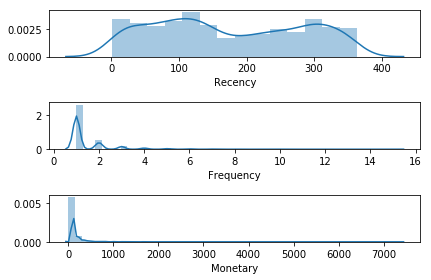

In [47]:
# plot the distribution of RFM values
plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.Monetary, label = 'Monetary')

plt.tight_layout()
plt.show()

Checking the distribution of our RFM values, we can see the Frequency and Monetary values are right skewed and will need to be normalized. K-means groups similar customers together into buckets based on the distance from their centroids. If we have values on a different distance scale, we may run into issues using K-means to form meaningful clusters.

To deal with this skewness we will apply a logarithmic transformation. However, before we do this, we first need to ensure all values are above zero. As the Monetary contains zeros, the first step is to transform to 1 before we can do the log transformation. This is because log of zero is infinity.

In [48]:
# Create a function for the values below or equal to zero (this will capture the zero's in Monetary)
def negative_to_zero(x):
    if x <= 0:
        return 1
    else:
        return x

In [49]:
#Apply the function to the Monetary column to turn zero's into ones. 
rfm['Monetary'] = [negative_to_zero(x) for x in rfm.Monetary]
rfm.sort_values('Monetary').head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level
customer_id,,,,,,,,,
858988249135,147,1,1,3,3,1,331,7.0,Silver
860468740143,145,1,1,3,3,1,331,7.0,Silver
559515500591,327,1,1,1,1,1,111,3.0,Bronze
860004941871,146,1,1,3,3,1,331,7.0,Silver
750976532527,246,1,1,2,2,1,221,5.0,Silver


Now that we have the minimum values for the Monetary column are 1, we can apply the log transformation.

In [50]:
# Apply a log transformation to unskew the data using np.log 
rfm_log = rfm[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
rfm_log.sort_values('Frequency', ascending=False).head()

,Recency,Frequency,Monetary
customer_id,,,
524170788911,1.609,2.708,7.346
517918162991,1.609,2.708,8.764
517449056303,2.485,2.565,7.091
530528632879,3.714,2.398,8.908
708882333743,3.912,2.303,7.761


Now that we unskewed data, we need to run diagnostics on key statistics of the dataframe, comparing the mean and standard deviation of each variable. Looking at the table below, we can see that each of the 3 RFM values has a different mean and standard deviation. 

K-means works well with variables of the same mean, and distribution, we now need to center the data so that all 3 RFM values have equal means. We do this by subtracting the average value from each observation. 

In [51]:
#Check the summary statistics
rfm_log.describe()

,Recency,Frequency,Monetary
count,3182.000000,3182.000000,3182.000000
mean,4.807665,0.259230,3.157186
std,1.053059,0.472717,2.098258
min,0.000000,0.000000,0.000000
25%,4.407000,0.000000,0.000000
50%,5.043000,0.000000,4.078000
75%,5.623000,0.693000,4.718000
max,5.897000,2.708000,8.908000


We will use StandardScaler from sklearn to scale.

In [52]:
#Import StndardScaler to scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)

In [53]:
# transform into a pandas dataframe
rfm_scaled = pd.DataFrame(rfm_scaled, index = rfm.index, columns = rfm_log.columns)
rfm_scaled.head()

,Recency,Frequency,Monetary
customer_id,,,
1000761032751,-1.136550,-0.54847,0.116216
1000945221679,-1.136550,-0.54847,0.438916
1000956428335,-1.136550,-0.54847,0.309741
1000981725231,-1.162193,-0.54847,-0.183127
1000989261871,-1.162193,-0.54847,0.309741


In [54]:
rfm_scaled.describe().round(2)

,Recency,Frequency,Monetary
count,3182.00,3182.00,3182.00
mean,-0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-4.57,-0.55,-1.50
25%,-0.38,-0.55,-1.50
50%,0.22,-0.55,0.44
75%,0.77,0.92,0.74
max,1.03,5.18,2.74


We now have all 3 RFM features with a mean of 0 and standard deviation of 1. 

C:\Users\andre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


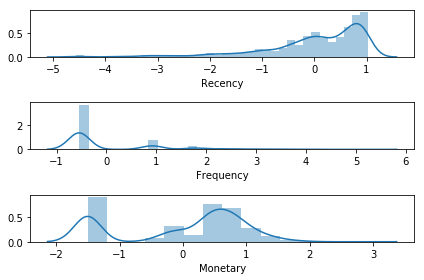

In [55]:
# plot the distribution of RFM values
plt.subplot(3, 1, 1); sns.distplot(rfm_scaled.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm_scaled.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm_scaled.Monetary, label = 'Monetary')

plt.tight_layout()
plt.show()

Now our Receny, Frequency and Monetary values now follow a roughly normal distribution, we will use the elbow method to find the ideal number of clusters 

In [56]:
#create an empty dictionary for to house our within cluster sum of squares
from sklearn.cluster import KMeans
wcss = {}

#Create a for loop using the eblow method
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, init= 'k-means++', max_iter= 300)
    kmeans.fit(rfm_scaled)
    wcss[i] = kmeans.inertia_

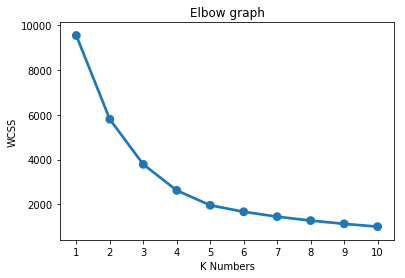

In [57]:
sns.pointplot(x = list(wcss.keys()), y = list(wcss.values()))
plt.title('Elbow graph')
plt.xlabel('K Numbers')
plt.ylabel('WCSS')
plt.show()

By eyeballing the Elbow graph, it's looks like the ideal number is 4. This appears to be the point where the lines rate of descent begins to flatten. Next we can use this number to build the model

## Calculating the silhoutte score

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

In [58]:
labels = kmeans.labels_
clusters = kmeans.cluster_centers_

In [59]:
rfm_scaled_silhouette = rfm_scaled[['Recency', 'Monetary', 'Frequency' ]]

In [60]:
from sklearn.metrics import silhouette_score

silhouette_score(rfm_scaled_silhouette, labels)

0.48778943170579653

In [61]:
#Using n_clusters 4
cluster = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 300, random_state=123)
cluster.fit(rfm_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [62]:
#Assign the K_Cluster field to the RFM dataframe.
rfm['K_Cluster'] = cluster.labels_
rfm.K_Cluster.nunique()

4

In [63]:
rfm.sort_values('RFM_Level', ascending=False).head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
customer_id,,,,,,,,,,
1000761032751,37,1,30,4,1,2,412,7.0,Silver,0
752804495407,244,1,19,2,2,2,222,6.0,Silver,2
753958682671,243,1,34,2,2,2,222,6.0,Silver,2
753881022511,243,1,59,2,2,3,223,7.0,Silver,2
753819648047,243,1,1,2,2,1,221,5.0,Silver,1


In [64]:
# assign cluster column 
rfm_scaled['K_Cluster'] = cluster.labels_
rfm_scaled['RFM_Level'] = rfm.RFM_Level
rfm_scaled.reset_index(inplace = True)

In [79]:
rfm_scaled.head()

,customer_id,Recency,Frequency,Monetary,K_Cluster,RFM_Level
0,1000761032751,-1.136550,-0.54847,0.116216,0,Silver
1,1000945221679,-1.136550,-0.54847,0.438916,0,Silver
2,1000956428335,-1.136550,-0.54847,0.309741,0,Silver
3,1000981725231,-1.162193,-0.54847,-0.183127,0,Silver
4,1000989261871,-1.162193,-0.54847,0.309741,0,Silver


In [66]:
# melt the dataframe so that RFM values and metric names are stored in one column each
rfm_melted = pd.melt(frame= rfm_scaled, id_vars= ['customer_id', 'RFM_Level', 'K_Cluster'], 
                     var_name = 'Metrics', value_name = 'Value')
rfm_melted.head()

,customer_id,RFM_Level,K_Cluster,Metrics,Value
0,1000761032751,Silver,0,Recency,-1.136550
1,1000945221679,Silver,0,Recency,-1.136550
2,1000956428335,Silver,0,Recency,-1.136550
3,1000981725231,Silver,0,Recency,-1.162193
4,1000989261871,Silver,0,Recency,-1.162193


We now have the recency, frequency and monetary fields stored in under column under metrics and the corresponding value. From here we can go ahead and create snake plots to visualize the differences between the RFM segments and the K-means segments.

### Snake Plots

Snake plots are a commonly used graph within market research used to compare and plot different RFM segments. The plots are created by plotting the metrics on the X axis and value on the Y axis, grouped by the RFM values in the first chart, and K-clusters in the second chart. This is passed through in the hue argument to create separate lines.

C:\Users\andre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


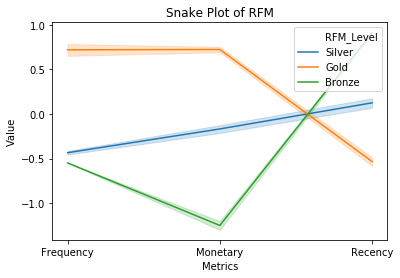

In [67]:
#Create a snake plot with RFM
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'RFM_Level', data = rfm_melted)
plt.title('Snake Plot of RFM')
plt.legend(loc = 'upper right')

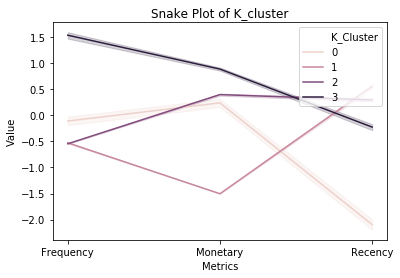

In [68]:
#Create a snake plot with K-Means
sns.lineplot(x = 'Metrics', y = 'Value', hue = 'K_Cluster', data = rfm_melted)
plt.title('Snake Plot of K_cluster')
plt.legend(loc = 'upper right')

By looking at the snakeplots, we can see some similarities. The Bronze customer class and K_Cluster group 1 appear to follow the same shape. 

### Heatmaps 

Next, we will look at heat maps to identify the relative importance of each segments attributes. The first step is to calculate the average RFM values of each cluster, and then repeat this process for the total population. Lastly, we will divide cluster average by the total average and subtract one from the result.

In [69]:
#Calculate the mean value for each cluster
cluster_avg = rfm.groupby('RFM_Level').mean().iloc[:, 0:3]
cluster_avg.head()

,Recency,Frequency,Monetary
RFM_Level,,,
Bronze,320.429368,1.000000,5.671004
Gold,94.872698,2.190552,181.742994
Silver,187.460215,1.082437,44.749104


In [70]:
#Calculate the mean value in total 
total_avg = rfm.iloc[:, 0:3].mean()
total_avg

Recency      173.599623
Frequency      1.503457
Monetary      91.914833
dtype: float64

In [71]:
#Calculate the proportional mean value
prop_rfm = cluster_avg/total_avg - 1
prop_rfm

,Recency,Frequency,Monetary
RFM_Level,,,
Bronze,0.845795,-0.334866,-0.938302
Gold,-0.453497,0.457010,0.977298
Silver,0.079842,-0.280034,-0.513146


In [72]:
#Reoder columns so that it reads Bronze, Silver, Gold
prop_rfm = prop_rfm.reindex(['Bronze', 'Silver', 'Gold'])

In [73]:
prop_rfm

,Recency,Frequency,Monetary
RFM_Level,,,
Bronze,0.845795,-0.334866,-0.938302
Silver,0.079842,-0.280034,-0.513146
Gold,-0.453497,0.457010,0.977298


We now have a dataframe containing the relative importance score for each RFM value of the segments. Values that are furthest away from 0 have the highest relative importance for a given segment, relative to the total population.

[]

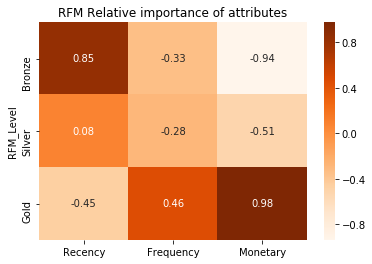

In [74]:
#Create a heatmap using the same dataframe to make it easier to view  and interpret the relative importance of attributes
sns.heatmap(prop_rfm, cmap= 'Oranges', fmt= '.2f', annot = True)
plt.title('RFM Relative importance of attributes')
plt.plot()

We now repeat this process for K-means

In [75]:
#Calculate the mean value for each cluster
cluster_avg_K = rfm.groupby('K_Cluster').mean().iloc[:, 0:3]

#Calcualte the proportional mean value
prop_rfm_K = cluster_avg_K/total_avg - 1
prop_rfm_K

,Recency,Frequency,Monetary
K_Cluster,,,
0,-0.890065,-0.105510,-0.086656
1,0.423497,-0.325307,-0.989029
2,0.100360,-0.333294,-0.248345
3,-0.259613,0.959472,1.539700


[]

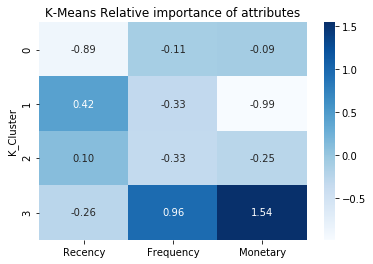

In [76]:
#Create the K-means relative importance of attributes heatmap
sns.heatmap(prop_rfm_K, cmap= 'Blues', fmt= '.2f', annot = True)
plt.title('K-Means Relative importance of attributes')
plt.plot()

While we have 1 more row in the K-means heatmap, we can still see similarities occur between the two plots. For example, the Gold customer segment in the RFM plot indexes very high for monetary, and relatively highly for frequency. We can see the same pattern occur for K-cluster 3 in the K-means heatmap.

## Logistic Regression 

Before building a Logistic Regression model, we first need to do pre-processing of data, including joining two dataframes together so that we have RFM scores and the predefined customer segments from shopify (loyal and at risk) within one single dataframe.

In [194]:
rfm.describe()

,Recency,Frequency,Monetary,RFM_Score,K_Cluster
count,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,173.599623,1.503457,91.914833,7.504085,1.775613
std,108.350761,1.152811,222.073896,2.728489,0.922966
min,1.000000,1.000000,1.000000,3.000000,0.000000
25%,82.000000,1.000000,1.000000,5.000000,1.000000
50%,155.000000,1.000000,59.000000,8.000000,2.000000
75%,276.750000,2.000000,112.000000,10.000000,2.000000
max,364.000000,15.000000,7388.000000,12.000000,3.000000


In [193]:
gogood.describe()

,product_price,total_sales,discounts,units_per_transaction,customer_type,at_risk,loyal,dormant,promising
count,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000,6866.000000
mean,36.306146,42.470580,-4.706234,1.235217,0.352898,0.063793,0.255025,0.045733,0.095543
std,26.288058,44.074324,14.940798,0.828052,0.477906,0.244401,0.435907,0.208920,0.293985
min,0.000000,0.000000,-190.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,45.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,59.000000,59.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,169.000000,468.000000,0.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
rfm.columns

Index(['Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Segment',
       'RFM_Score', 'RFM_Level', 'K_Cluster'],
      dtype='object')

In [92]:
#create a new dataframe using the original RFM dataframe 
rfm_join = rfm

In [94]:
rfm_join.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
customer_id,,,,,,,,,,
1000761032751,37,1,30,4,1,2,412,7.0,Silver,0
1000945221679,37,1,59,4,1,2,412,7.0,Silver,0
1000956428335,37,1,45,4,1,2,412,7.0,Silver,0
1000981725231,36,1,16,4,1,2,412,7.0,Silver,0
1000989261871,36,1,45,4,1,2,412,7.0,Silver,0


In [95]:
#reset the index so that customer ID is now a column
rfm_join.reset_index(level=0, inplace=True)
rfm_join.head()

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster
0,1000761032751,37,1,30,4,1,2,412,7.0,Silver,0
1,1000945221679,37,1,59,4,1,2,412,7.0,Silver,0
2,1000956428335,37,1,45,4,1,2,412,7.0,Silver,0
3,1000981725231,36,1,16,4,1,2,412,7.0,Silver,0
4,1000989261871,36,1,45,4,1,2,412,7.0,Silver,0


In [98]:
rfm_join.columns

Index(['customer_id', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M',
       'RFM_Segment', 'RFM_Score', 'RFM_Level', 'K_Cluster'],
      dtype='object')

In [99]:
gogood.head()

,day,order_id,customer_id,product_type,product_title,product_id,product_price,total_sales,discounts,units_per_transaction,customer_type,at_risk,loyal,dormant,promising
0,2018-06-12,431055175727,514963636271,Whey Protein,Organic Vanilla Whey Protein Powder,555924291631,56,112,0,2,0,0,0,0,0
1,2018-06-12,430915026991,514794946607,Whey Protein,Organic Vanilla Whey Protein Powder,555924291631,56,112,0,2,0,0,0,0,1
2,2018-06-12,430975877167,514870345775,Whey Protein,Organic Chocolate Whey Protein Powder,555924455471,59,59,0,1,0,0,0,0,0
3,2018-06-12,430958739503,514851831855,Whey Protein,Organic Chocolate Whey Protein Powder,555924455471,56,56,0,1,0,0,0,0,0
4,2018-06-12,430999568431,514901901359,Whey Protein,Organic Chocolate Whey Protein Powder,555924455471,56,46,-9,1,0,1,0,0,0


In [115]:
#create a new dataframe with the customer segments from shopify and customer ID
gogood_customer_type = gogood[['customer_id', 'customer_type', 'at_risk', 'loyal']]
gogood_customer_type.nunique()

customer_id      3182
customer_type       2
at_risk             2
loyal               2
dtype: int64

In [151]:
#merge the two new dataframes together on the customer ID. 
merged_inner = pd.merge(left=rfm_join_test,right=gogood_customer_type, left_on='customer_id', right_on='customer_id')

In [152]:
merged_inner.sort_values('customer_id').head()

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,RFM_Level,K_Cluster,customer_type,at_risk,loyal
0,1000761032751,37,1,30,4,1,2,412,7.0,Silver,0,0,0,0
1,1000761032751,37,1,30,4,1,2,412,7.0,Silver,0,0,0,0
2,1000761032751,37,1,30,4,1,2,412,7.0,Silver,0,0,0,0
3,1000945221679,37,1,59,4,1,2,412,7.0,Silver,0,0,0,0
4,1000956428335,37,1,45,4,1,2,412,7.0,Silver,0,0,0,0


In [154]:
merged_inner.shape

(6866, 14)

In [155]:
#drop duplicate customer IDs so we are only left with unique customer IDs
merged_inner = merged_inner.drop_duplicates(subset='customer_id', keep= 'first')

In [157]:
merged_inner.shape

(3182, 14)

## Creating the Logistic Regression Model

Now that we have joined the two dataframes, we will build our Logistic Regression model with the Recency, Frequency and Monetary categories as our input feature (X) and loyal as our predicator (Y). 

We are using the RFM values as the input features as these are the values Shopify uses to categorize customers into different segments, such as 'loyal' and 'at_risk'. Given we already have examples of each of these segments within our dataframe, the purpose of running the Logistic Regression model is to determine how effective these 3 features can classify users into a specific segment. Based off the results of this Logistic Regression model, we will be able to determine how accurate the Shopify classification model is in classifying users give their associated recency, frequency and monetary values.

In [211]:
#Checking the distribution of 'loyal' customers across the dataframe. 
merged_inner['loyal'].value_counts()

0    2909
1     273
Name: loyal, dtype: int64

In [215]:
#Checking the distribution of 'at_risk' customers across the dataframe. 
merged_inner['at_risk'].value_counts()

0    3060
1     122
Name: at_risk, dtype: int64

In [221]:
print("The percentage of loyal customers in the dataframe:",(273/3182)*100)
print("The percentage of at risk customers in the dataframe:",(122/3182)*100)

The percentage of loyal customers in the dataframe: 8.57950974230044
The percentage of at risk customers in the dataframe: 3.8340666247642994


In total, 8.6% of the dataframe is labeled as a loyal customer, and 3.8% are at risk.

In [236]:

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
X = merged_inner[['Recency','Frequency', 'Monetary']]
y = merged_inner.loyal

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

LR.fit(X_train,y_train)

y_pred = LR.predict(X_test)

C:\Users\andre\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Confusion Matrix

In [183]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[717,   5],
       [ 12,  62]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

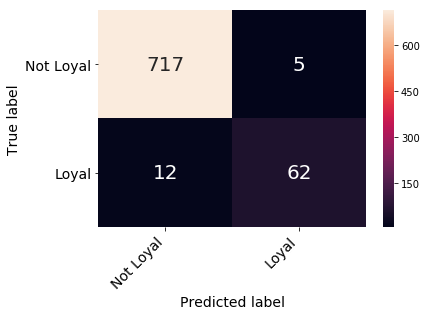

In [205]:
confusion_matrix_df = pd.DataFrame(cnf_matrix, ('Not Loyal', 'Loyal'), ('Not Loyal', 'Loyal'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

In [226]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9824120603015075
Precision: 0.9508196721311475
Recall: 0.8405797101449275


The accuracy score is a measure of the subset accuracy. Its calculated as TP + TN / (TP + TN + FP + FN). In our case, the accuracy score of the model is 98%, which is almost a perfect fit.

The precision score refers to the fraction of predicted positive events that are actually positive. This ratio is calculated as TP / (TP + FP). In our model, this occurs 95% of the time. 

Lastly, the recall score the ability of the classifier to find all the positive samples. Or, the fraction of positive events that were predicated correctly. It is calculated as TP / (TP + FN). This metric is In our model, this occurs 84% of the time.

### ROC Curve

The goal of variable selection is to select a set of variables that has optimal performance. Receiver Operating Characteristic (ROC) curve are often used to quantify the performance of Logistic Regression models. ROC helps to plot the true positive rate against the false positive rate. The values on the curve range from 0 to 1, where prefect models have an AUC of 1, whereas an AUC score of 0.5 can be considered a worthless model.

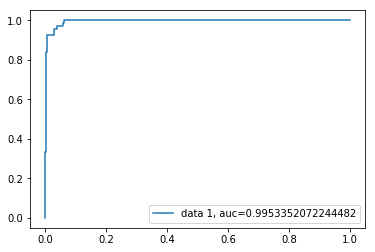

In [197]:
y_pred_proba = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The AUC score in our case is 0.99, which is almost a perfect classifier. 

# Conclusion

The goal of this project to identify different segments of Go Good customers through analysis historical customer purchase data. This was achieved through the RFM segmentation and K-means clustering techniques. Heatmaps were produced to show the relative importance of the RFM values for the RFM segments (Bronze, Silver, Gold) and K-means model. The segments created through the RFM quantiles and K-means model can be used to identify who the most profitable customer segments are, as well as those who are of lower value.   

The Linear Regression model was created using the RFM categories as input feature to predict customer loyalty. We saw that the model had extremely high accuracy, precession and recall scores, indicating a perfect fit. This was further supported by the AUC score of 0.99. 

In conclusion, we have now built a framework for identifying unique customer segments. These segments can now be used to inform marketing strategy for Go Good. For example, tailoring marketing campaigns to certain segments, and building lookalike audience profiles within Google / Facebook ads.

# Future work / Potentail improvements 

In future, I would like to calculate customer lifetime value (CLTV) for each of the RFM segments. This can be easily achieved using metrics readily available, including average order value, purchase frequency, and customer value. Additionally, I would like to create additional visualizations of model performance that are more relevant for business stakeholders, or a non-technical audience. Such examples could include the cumulative gains curve and lift graph that is easily explainable. These graphs could also be used to estimate the profit a campaign will make. 

Improvements could be made to this analysis by looking at other models, including tree based algorithms such as Decision Tree and Random Forrest.